# Logistic regression using `scikit-learn`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm, metrics, model_selection as ms

In [2]:
WHITES_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

Read in the Wine Quality dataset.

In [3]:
whites = pd.read_csv(WHITES_URL, sep=';')

Define a new variable 'good_quality' for wines with quality >= 7.

In [4]:
whites['good_quality'] = whites['quality'] >= 7

Fit a logistic regression model for 'good_quality' using all predictors.

In [5]:
X = whites.drop(['quality', 'good_quality'], axis=1)
y = whites.good_quality
model1 = lm.LogisticRegression(C=1e50)
model1.fit(X, y)

LogisticRegression(C=1e+50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Print variable names and odds ratios.

In [6]:
list(zip(X.columns, np.exp(model1.coef_[0,:])))

[('fixed acidity', 1.0810410756727584),
 ('volatile acidity', 0.015690293147889622),
 ('citric acid', 0.32820820066174727),
 ('residual sugar', 1.0638725364239927),
 ('chlorides', 0.018305847123870646),
 ('free sulfur dioxide', 1.0130823584311766),
 ('total sulfur dioxide', 0.99630004580264153),
 ('density', 0.00044785699504704379),
 ('pH', 3.5169911495083648),
 ('sulphates', 3.7352369454864016),
 ('alcohol', 2.5369250240404138)]

Define 10 folds for stratified cross-validation.

In [7]:
ten_fold_cv = ms.StratifiedKFold(n_splits=10, shuffle=True)

Compute average classification accuracy across folds.

In [8]:
accuracies = ms.cross_val_score(lm.LogisticRegression(C=1e50), X, y, scoring='accuracy', cv=ten_fold_cv)
np.mean(accuracies)

0.80073703100872251

Compute average AUC across folds.

In [9]:
aucs = ms.cross_val_score(lm.LogisticRegression(C=1e50), X, y, scoring='roc_auc', cv=ten_fold_cv)
np.mean(aucs)

0.78363266689040512

Determine 'optimal' value of `C` by cross-validation using AUC scoring and $L_{2}$ regularisation.

In [10]:
model2 = lm.LogisticRegressionCV(Cs=10, cv=ten_fold_cv, scoring='roc_auc')
model2.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None,
           cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='lbfgs', tol=0.0001, verbose=0)

Print variable names and odds ratios for the 'best' model.

In [11]:
list(zip(X.columns, np.exp(model2.coef_[0,:])))

[('fixed acidity', 1.0084679728152037),
 ('volatile acidity', 0.036364848723236143),
 ('citric acid', 0.56872122880945719),
 ('residual sugar', 1.0545233215017324),
 ('chlorides', 1.1871894984026546e-05),
 ('free sulfur dioxide', 1.013213193987073),
 ('total sulfur dioxide', 0.99627480518924749),
 ('density', 0.15894964684699192),
 ('pH', 2.5424374020011458),
 ('sulphates', 3.7497378767424414),
 ('alcohol', 2.3730543464597353)]

Compute confusion matrix for the 'best' model.

In [12]:
metrics.confusion_matrix(y, model2.predict(X))

array([[3665,  173],
       [ 784,  276]])

Plot the ROC curve for the 'best' model.

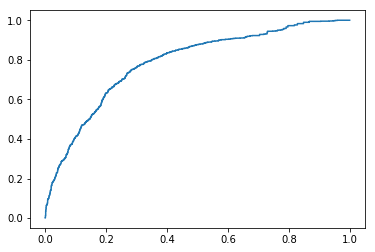

In [13]:
fpr, tpr, cutoffs = metrics.roc_curve(y, model2.predict_proba(X)[:,1])
plt.plot(fpr, tpr)